In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('/content/Titanic_ISTE.csv',index_col = 'PassengerId')
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    float64
 1   Pclass       890 non-null    float64
 2   Name         891 non-null    object 
 3   Sex          881 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        890 non-null    float64
 6   Parch        889 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Unnamed: 12  0 non-null      float64
 12  Unnamed: 13  0 non-null      float64
 13  Unnamed: 14  0 non-null      float64
 14  Unnamed: 15  0 non-null      float64
 15  Unnamed: 16  0 non-null      float64
 16  Unnamed: 17  1 non-null      float64
dtypes: float64(12), object(5)
memory usage: 125.3+ KB


In [3]:
df = df.drop(columns=['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Cabin','Ticket','Name'])

In [4]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
2,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
3,1.0,3.0,female,26.0,0.0,0.0,7.9250,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    890 non-null    float64
 2   Sex       881 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     890 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(6), object(2)
memory usage: 62.6+ KB


In [6]:
df['Sex'].fillna('male',inplace = True)
df['Pclass'].fillna(1,inplace= True)
df['Age'].fillna(df['Age'].mean(),inplace= True)
df['Survived'].fillna(0,inplace= True)
df['SibSp'].fillna(0,inplace= True)
df['Parch'].fillna(0,inplace= True)
df['Embarked'].fillna('S',inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(6), object(2)
memory usage: 62.6+ KB


In [8]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
2,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
3,1.0,3.0,female,26.0,0.0,0.0,7.9250,S


In [9]:
d = pd.get_dummies(df['Sex']).drop(['male'],axis='columns').astype('int64')
df = pd.concat([df,d],axis='columns').drop('Sex',axis='columns')

de = pd.get_dummies(df['Embarked']).drop(['S'],axis='columns').astype('int64')
df = pd.concat([df,de],axis='columns').drop('Embarked',axis='columns')

df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q
PassengerId,,,,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500,0,0,0
2,1.0,1.0,38.0,1.0,0.0,71.2833,1,1,0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1,0,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   female    891 non-null    int64  
 7   C         891 non-null    int64  
 8   Q         891 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 69.6 KB


## Sigmoid Funtion
$ sigmoid(z) = \frac{1}{1 + e^{-z}} $

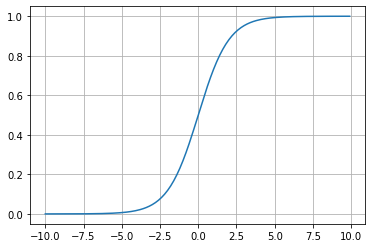

In [11]:
import math 
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+(math.e**-z))
x = np.arange(-10,10,0.1)
plt.plot(x,sigmoid(x))
plt.grid(True)

In [12]:
df['theta0'] = 1 

In [13]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q,theta0
PassengerId,,,,,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500,0,0,0,1
2,1.0,1.0,38.0,1.0,0.0,71.2833,1,1,0,1
3,1.0,3.0,26.0,0.0,0.0,7.9250,1,0,0,1


In [14]:
# df['Fare'] = (df['Fare'] - df['Fare'].mean())/df['Fare'].std()
# df['Age'] = (df['Age'] - df['Age'].mean())/df['Age'].std()    doesnt work

### Scaling data

In [15]:
df['Fare'] = df['Fare']/df['Fare'].mean()
df['Age'] = df['Age']/df['Age'].mean()

In [16]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q,theta0
PassengerId,,,,,,,,,,
1,0.0,3.0,0.741345,1.0,0.0,0.225126,0,0,0,1
2,1.0,1.0,1.280505,1.0,0.0,2.213478,1,1,0,1
3,1.0,3.0,0.876135,0.0,0.0,0.246086,1,0,0,1
4,1.0,1.0,1.179412,1.0,0.0,1.648853,1,0,0,1
5,0.0,3.0,1.179412,0.0,0.0,0.249967,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0.0,2.0,0.909832,0.0,0.0,0.403674,0,0,0,1
888,1.0,1.0,0.640252,0.0,0.0,0.931555,1,0,0,1
889,0.0,3.0,1.000000,1.0,2.0,0.728166,1,0,0,1


In [17]:
X = np.array(df[['theta0','Pclass','Age','Parch','SibSp','female','Fare','C','Q']])
y = np.array(df[['Survived']]) 

In [18]:
print(X.shape,y.shape)


(891, 9) (891, 1)


## Splitting data into training and validation sets

In [19]:
X_val = X[800:]
y_val = y[800:]
print(X_val.shape, y_val.shape)

(91, 9) (91, 1)


In [20]:
X = X[:800]
y = y[:800]
print(X.shape, y.shape)

(800, 9) (800, 1)


## Hypothesis Function
$ h_{θ}(x) = g(θ^T,X) $


In [21]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

### Intial theta values 

In [22]:
intial_theta = np.zeros([9,1])
intial_theta.shape

(9, 1)

In [23]:
hyp(intial_theta, X).shape

(800, 1)

## Cost Function 
Cost function with ridge regularization 
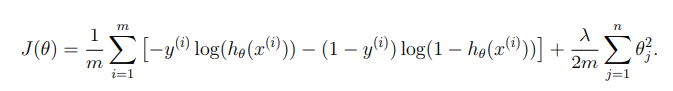

In [24]:
m = 800 #number of data points
def cost_function(theta,X_h,y_h,l = 0):
    fp =  np.dot(y_h.T,np.log(hyp(theta,X_h)))
    sp =   np.dot((1 - y_h).T,np.log(1 - hyp(theta,X_h)))
    return float(-np.sum(fp+sp)/m) + float(l*np.dot(theta.T, theta)/(2*m))
    
cost_function(intial_theta,X,y,1)

0.6931471805599451

## Gradient Descent
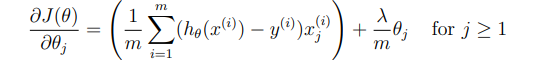

In [32]:
alpha = 0.5
theta_v = intial_theta
epochs = 600
cost_func_graph = []
l = 1

for i in range(epochs):
    theta_v = theta_v - alpha*np.dot(hyp(theta_v,X).T - y.T ,X ).T/m - l*theta_v/m
    cost_func_graph.append(cost_function(theta_v,X,y))
    if i%100==0:
      print(f'epoch : {i}  , loss : {cost_func_graph[-1]}')

epoch : 0  , loss : 0.630009109351616
epoch : 100  , loss : 0.4567835293099756
epoch : 200  , loss : 0.45063873806308336
epoch : 300  , loss : 0.4488254101823441
epoch : 400  , loss : 0.4478571348408545
epoch : 500  , loss : 0.44725618970628006


In [33]:
(hyp(intial_theta,X).T - y.T).shape 

(1, 800)

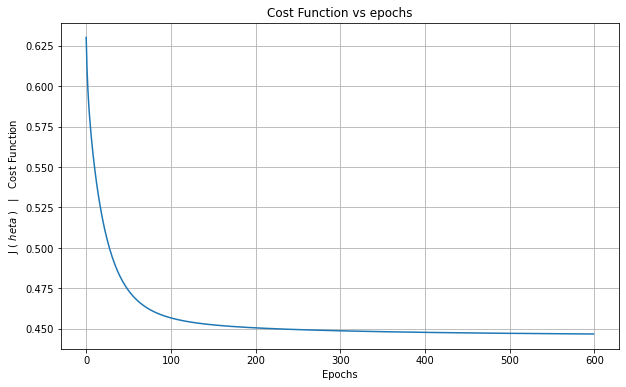

In [37]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(epochs)],cost_func_graph) 
plt.xlabel("Epochs")
plt.ylabel("J ( $\theta $ )   |   Cost Function")
plt.title('Cost Function vs epochs')
plt.grid(True)

In [35]:
predictions = hyp(theta_v,X_val)
corr = 0
total = 0
for p, l in zip(predictions, y_val):
  p_now = 0
  if p>=0.5:
    p_now = 1
  if p_now==l:
    corr +=1
  total+=1

print(f'Accuracy : {corr*100/total :.3f}')

Accuracy : 81.319
